# The company wishes to clarify whether there is any increase in sales after stepping into digital marketing 

In [1]:
import pandas as pd
from scipy import stats

In [66]:
data = pd.read_csv('Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [3]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [5]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [6]:
data['Manager'].value_counts()

Manager - A    9
Manager - B    7
Manager - C    6
Name: Manager, dtype: int64

In [7]:
data['Region'].value_counts()

Region - A    10
Region - B     7
Region - C     5
Name: Region, dtype: int64

In [70]:
data.columns = ['Month','Region','Manager','timerange1','timerange2']

In [71]:
data_mlt = data.melt(['Month','Region','Manager'],['timerange1','timerange2'],'timerange','Sales')
data_mlt.head()

,Month,Region,Manager,timerange,Sales
0,Month-1,Region - A,Manager - A,timerange1,132921
1,Month-2,Region - A,Manager - C,timerange1,149559
2,Month-3,Region - B,Manager - A,timerange1,146278
3,Month-4,Region - B,Manager - B,timerange1,152167
4,Month-5,Region - C,Manager - B,timerange1,159525


In [72]:
data_mlt['timerange']=data_mlt['timerange'].apply(lambda s: int(s[9]))

In [73]:
data_mlt.head()

,Month,Region,Manager,timerange,Sales
0,Month-1,Region - A,Manager - A,1,132921
1,Month-2,Region - A,Manager - C,1,149559
2,Month-3,Region - B,Manager - A,1,146278
3,Month-4,Region - B,Manager - B,1,152167
4,Month-5,Region - C,Manager - B,1,159525


In [79]:
timeframedata=data_mlt.groupby(['Month','timerange'])['Sales'].sum().reset_index()

In [80]:
timeframedata.head()

,Month,timerange,Sales
0,Month-1,1,132921
1,Month-1,2,270390
2,Month-10,1,141956
3,Month-10,2,193735
4,Month-11,1,159339


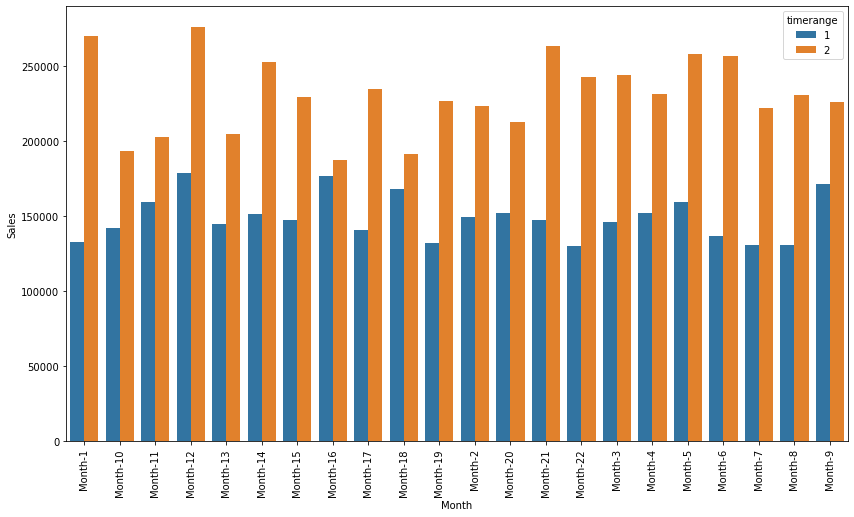

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
g = sns.barplot(data = timeframedata,
           x='Month',
           y='Sales',
           hue='timerange',
           ci= None
           )

g.set_xticklabels(
    labels = g.get_xticklabels(),
    rotation = 90,
    )
plt.show()


# Visually, we can see that during the time period 2, which is after digital marketing was introduced, the sales figures are all higher (orange colour)

To find the sum of sales for all the 22 months prior to introduction of digital marketing, we add all "Sales" values, for timerange='1'

In [93]:
filt_bef_DM = data_mlt['timerange'] == 1

In [94]:
data_mlt.loc[filt_bef_DM, 'Sales'].sum()

3283279

To find the sum of all the 22 months after introduction of digital marketing, we add all "Sales" values, for timerange='2'

In [95]:
filt_aft_DM = data_mlt['timerange'] == 2

In [96]:
data_mlt.loc[filt_aft_DM, 'Sales'].sum()

5084722

**The above figures show that sum of sales before DM was 3.28 million USD and after DM was 5.08 million USD**

# To determine the relationship between "Region" and "Manager", we need to perform a chi-squared test between the two categorical variables.

In [83]:
ct = pd.crosstab(data.Region, data.Manager, margins=True)

In [84]:
print(ct)

Manager     Manager - A  Manager - B  Manager - C  All
Region                                                
Region - A            4            3            3   10
Region - B            4            1            2    7
Region - C            1            3            1    5
All                   9            7            6   22


In [86]:
import numpy as np
obs=np.array([ct.iloc[0][0:3].values,
             ct.iloc[1][0:3].values,
              ct.iloc[2][0:3].values])
stats.chi2_contingency(obs)[0:3]

(3.050566893424036, 0.5493991051158094, 4)

**Since the value of p is 0.549, with a cut-off of 0.05, we fail to reject the null hypothesis of no significant relationship between "Region" and "Manager". In other words, the data does not suggest a relationship between "Region" and "Manager"**